In [54]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import napari

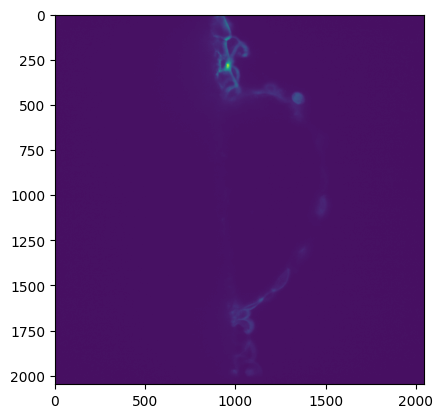

In [55]:
image = sk.io.imread('./domes/Dome103_raw.tif')
im = image[100]
plt.imshow(im)

In [56]:
kernel_vertical = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])
kernel_horizontal = np.array([[-1, -1, -1],
                              [0, 0, 0],
                              [1, 1, 1]])
kernel_45 = np.array([[0, 1, 1],
                      [-1, 0, 1],
                      [-1, -1, 0]])
kernel_135 = np.array([[1, 1, 0],
                       [1, 0, -1],
                       [0, -1, -1]])
im1 = convolve2d(im, kernel_vertical)
im2 = convolve2d(im, kernel_horizontal)
im3 = convolve2d(im, kernel_45)
im4 = convolve2d(im, kernel_135)

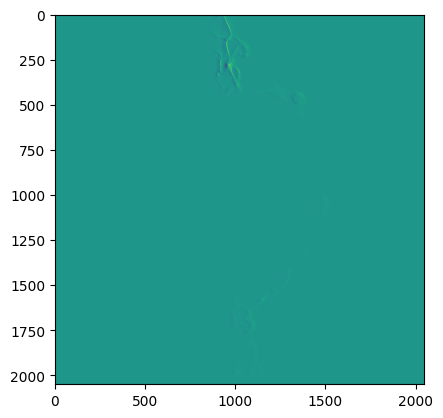

In [57]:
plt.imshow(im1+im2+im3+im4)

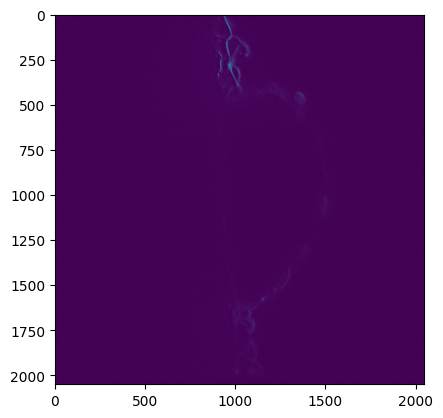

In [58]:
total_im = im1+im2+im3+im4
total_im[total_im <= 0] = 0
plt.imshow(total_im)

In [59]:
def kernelize(im):
  kernel_vertical = np.array([[-1, 0, 1],
                              [-1, 0, 1],
                              [-1, 0, 1]])
  kernel_horizontal = np.array([[-1, -1, -1],
                                [0, 0, 0],
                                [1, 1, 1]])
  kernel_45 = np.array([[0, 1, 1],
                        [-1, 0, 1],
                        [-1, -1, 0]])
  kernel_135 = np.array([[1, 1, 0],
                        [1, 0, -1],
                        [0, -1, -1]])
  im1 = convolve2d(im, kernel_vertical)
  im2 = convolve2d(im, kernel_horizontal)
  im3 = convolve2d(im, kernel_45)
  im4 = convolve2d(im, kernel_135)
  
  return (im1+im2+im3+im4)


krm = []
for i in image:
    krm.append(kernelize(i))

krm = np.array(krm)

In [72]:
viewer = napari.Viewer()

In [73]:
krm[krm <= 0] = 0


viewer.add_image(krm)

<Image layer 'krm' at 0x2bb3cd43f10>

In [62]:
krm2 = []
for i in np.transpose(image, axes=(1,0,2)):
    krm2.append(kernelize(i))

krm2 = np.array(krm2)

In [63]:
krm2[krm2 <= 0] = 0
krm2 = np.transpose(krm2, axes=(1,0,2))

viewer.add_image(krm2)

<Image layer 'krm2' at 0x2bb31c87410>

In [74]:
viewer.add_image(image)

<Image layer 'image' at 0x2bccf2cbc50>

In [64]:
print(krm.shape ,krm2.shape, image.shape)

(161, 2050, 2050) (163, 2048, 2050) (161, 2048, 2048)
